Text(0, 0.5, 'Trigger sensitivity')

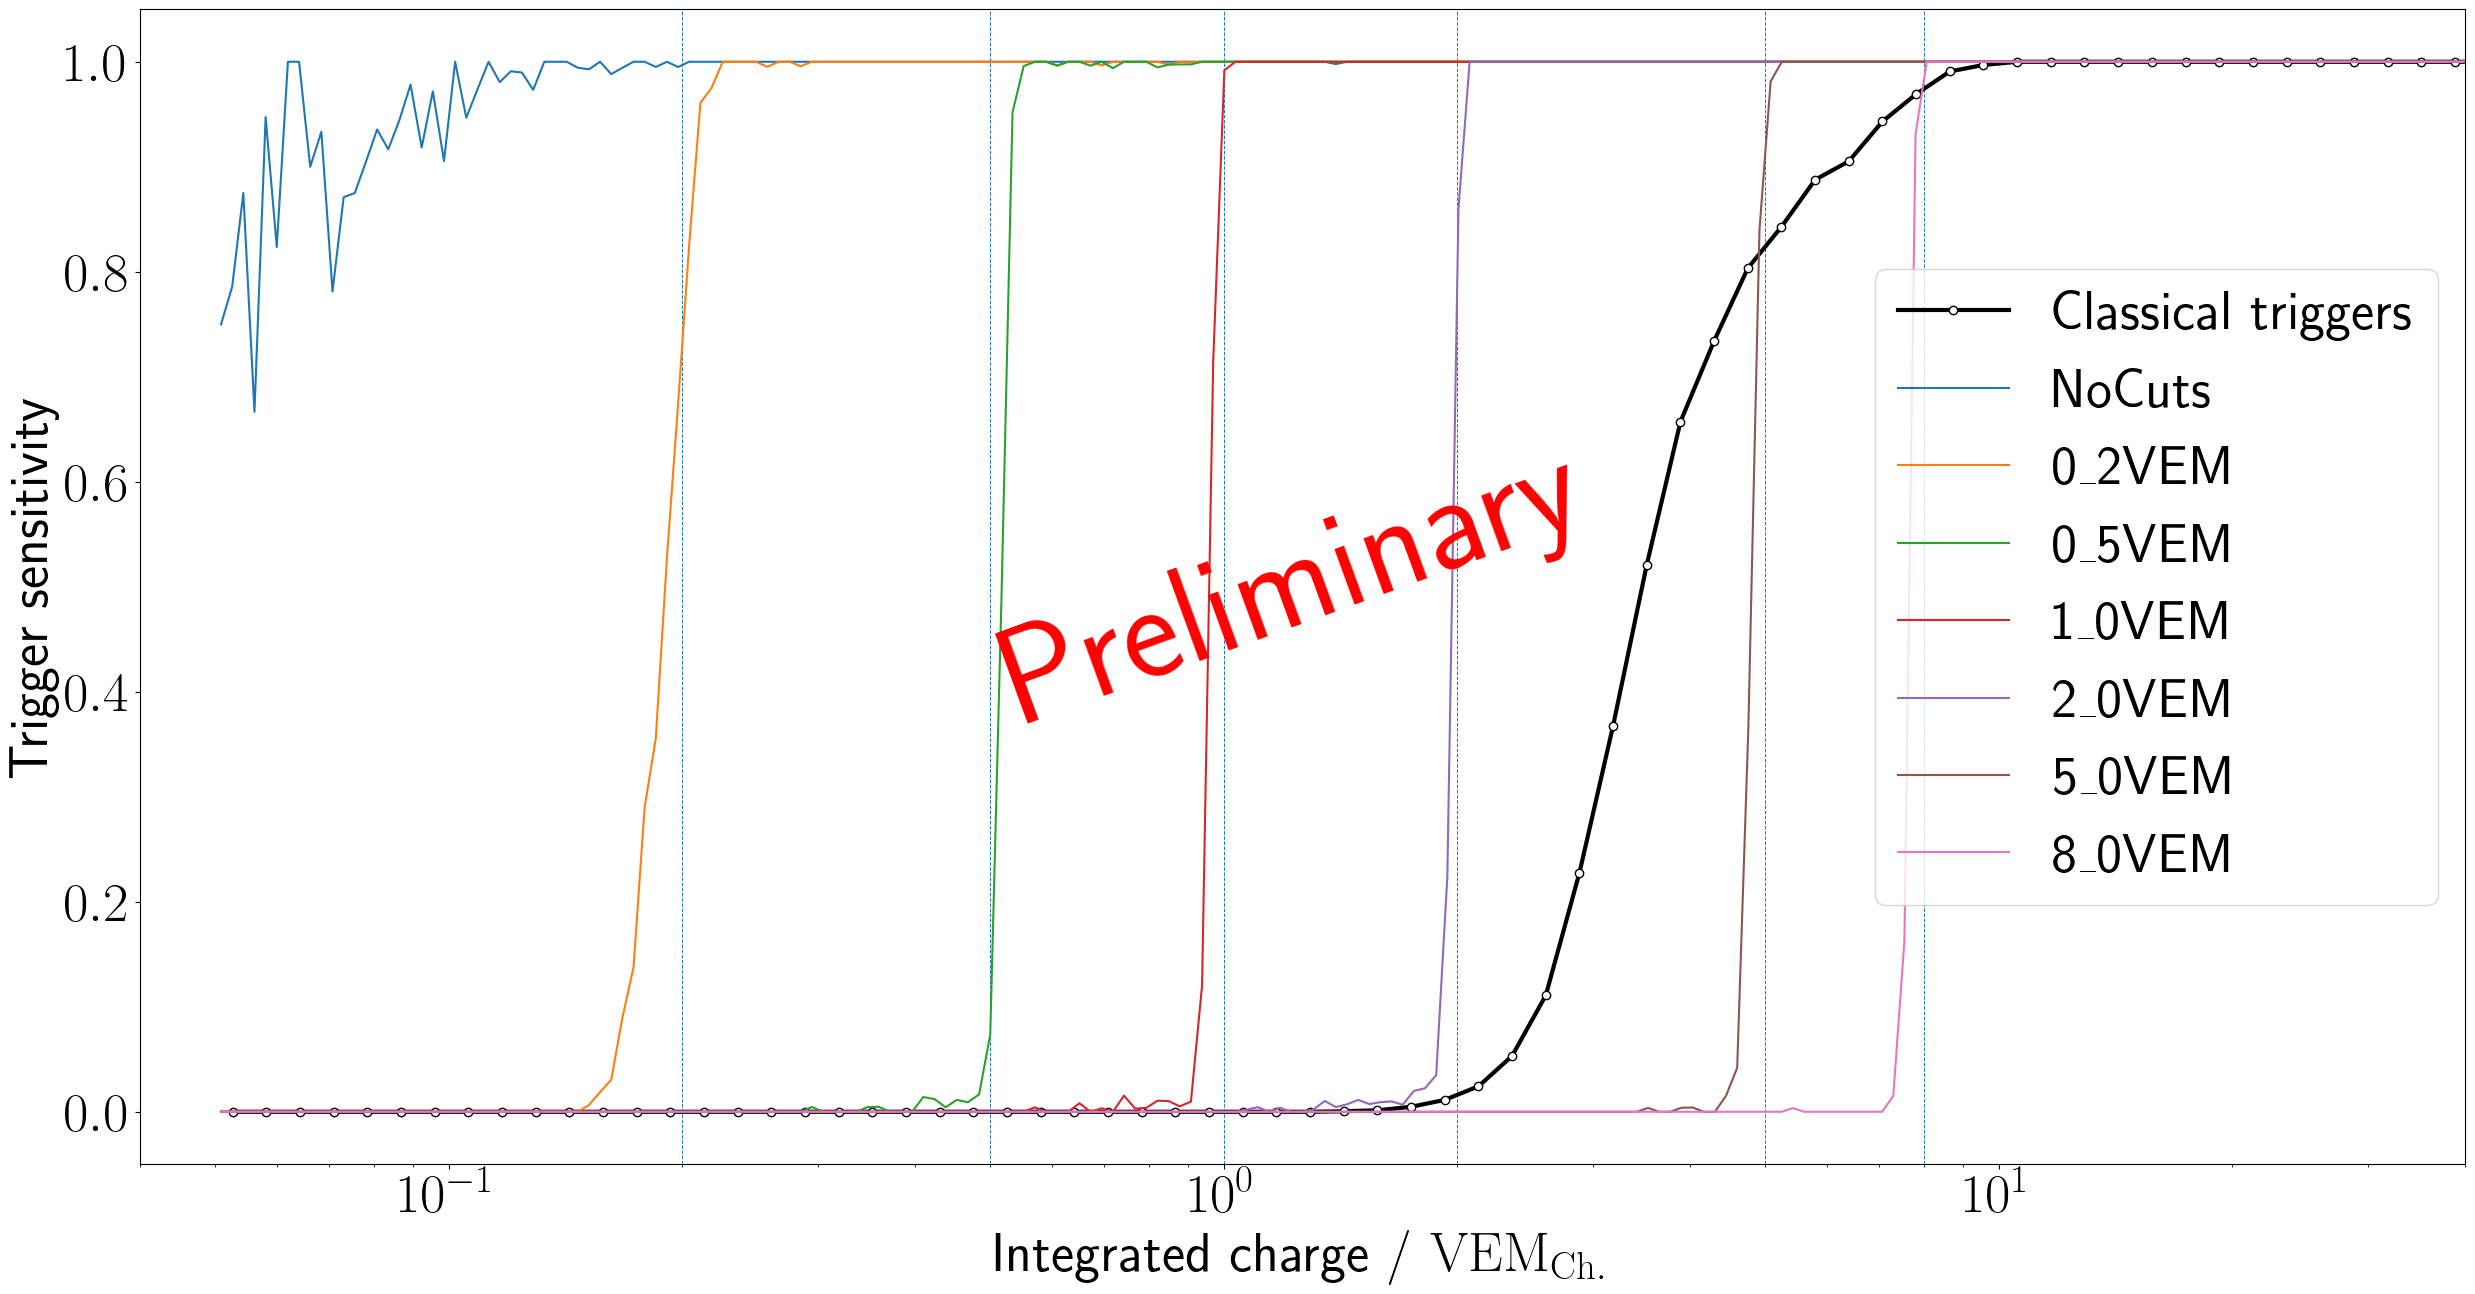

In [2]:
from Binaries import *

Trigger = HardwareClassifier()
Trigger.signal_efficiency("final_all_triggers", c = "k", lw = 3, label = "Classical triggers", mfc = "w", fmt = "-o")

for i_ch in ["NoCuts", "0_2VEM", "0_5VEM", "1_0VEM", "2_0VEM", "5_0VEM", "8_0VEM"]:
    save_model = "validation_data_no_cuts" if i_ch != "NoCuts" else "validation_data"
    Models = Ensemble(f"120_TwoLayer_Downsampled_AllEnergies_{i_ch}", supress_print = True)
    BestModel = Models.get_best_model(save_model)
    BestModel.signal_efficiency(save_model, label = i_ch, n_bins = 300)

for x in [0.2, 0.5, 1.0, 2.0, 5.0, 8.0]:
    plt.axvline(x, ls = "--", lw = 0.7)

plt.text(0.5, 0.5, "Preliminary", rotation = 20, transform = plt.gca().transAxes, color = "red", fontsize = 100, 
         verticalalignment = "center",
         horizontalalignment = "center")

plt.xlim(0.04, 40)
plt.xscale("log")
plt.legend()
plt.xlabel("Integrated charge / $\mathrm{VEM}_\mathrm{Ch.}$")
plt.ylabel("Trigger sensitivity")

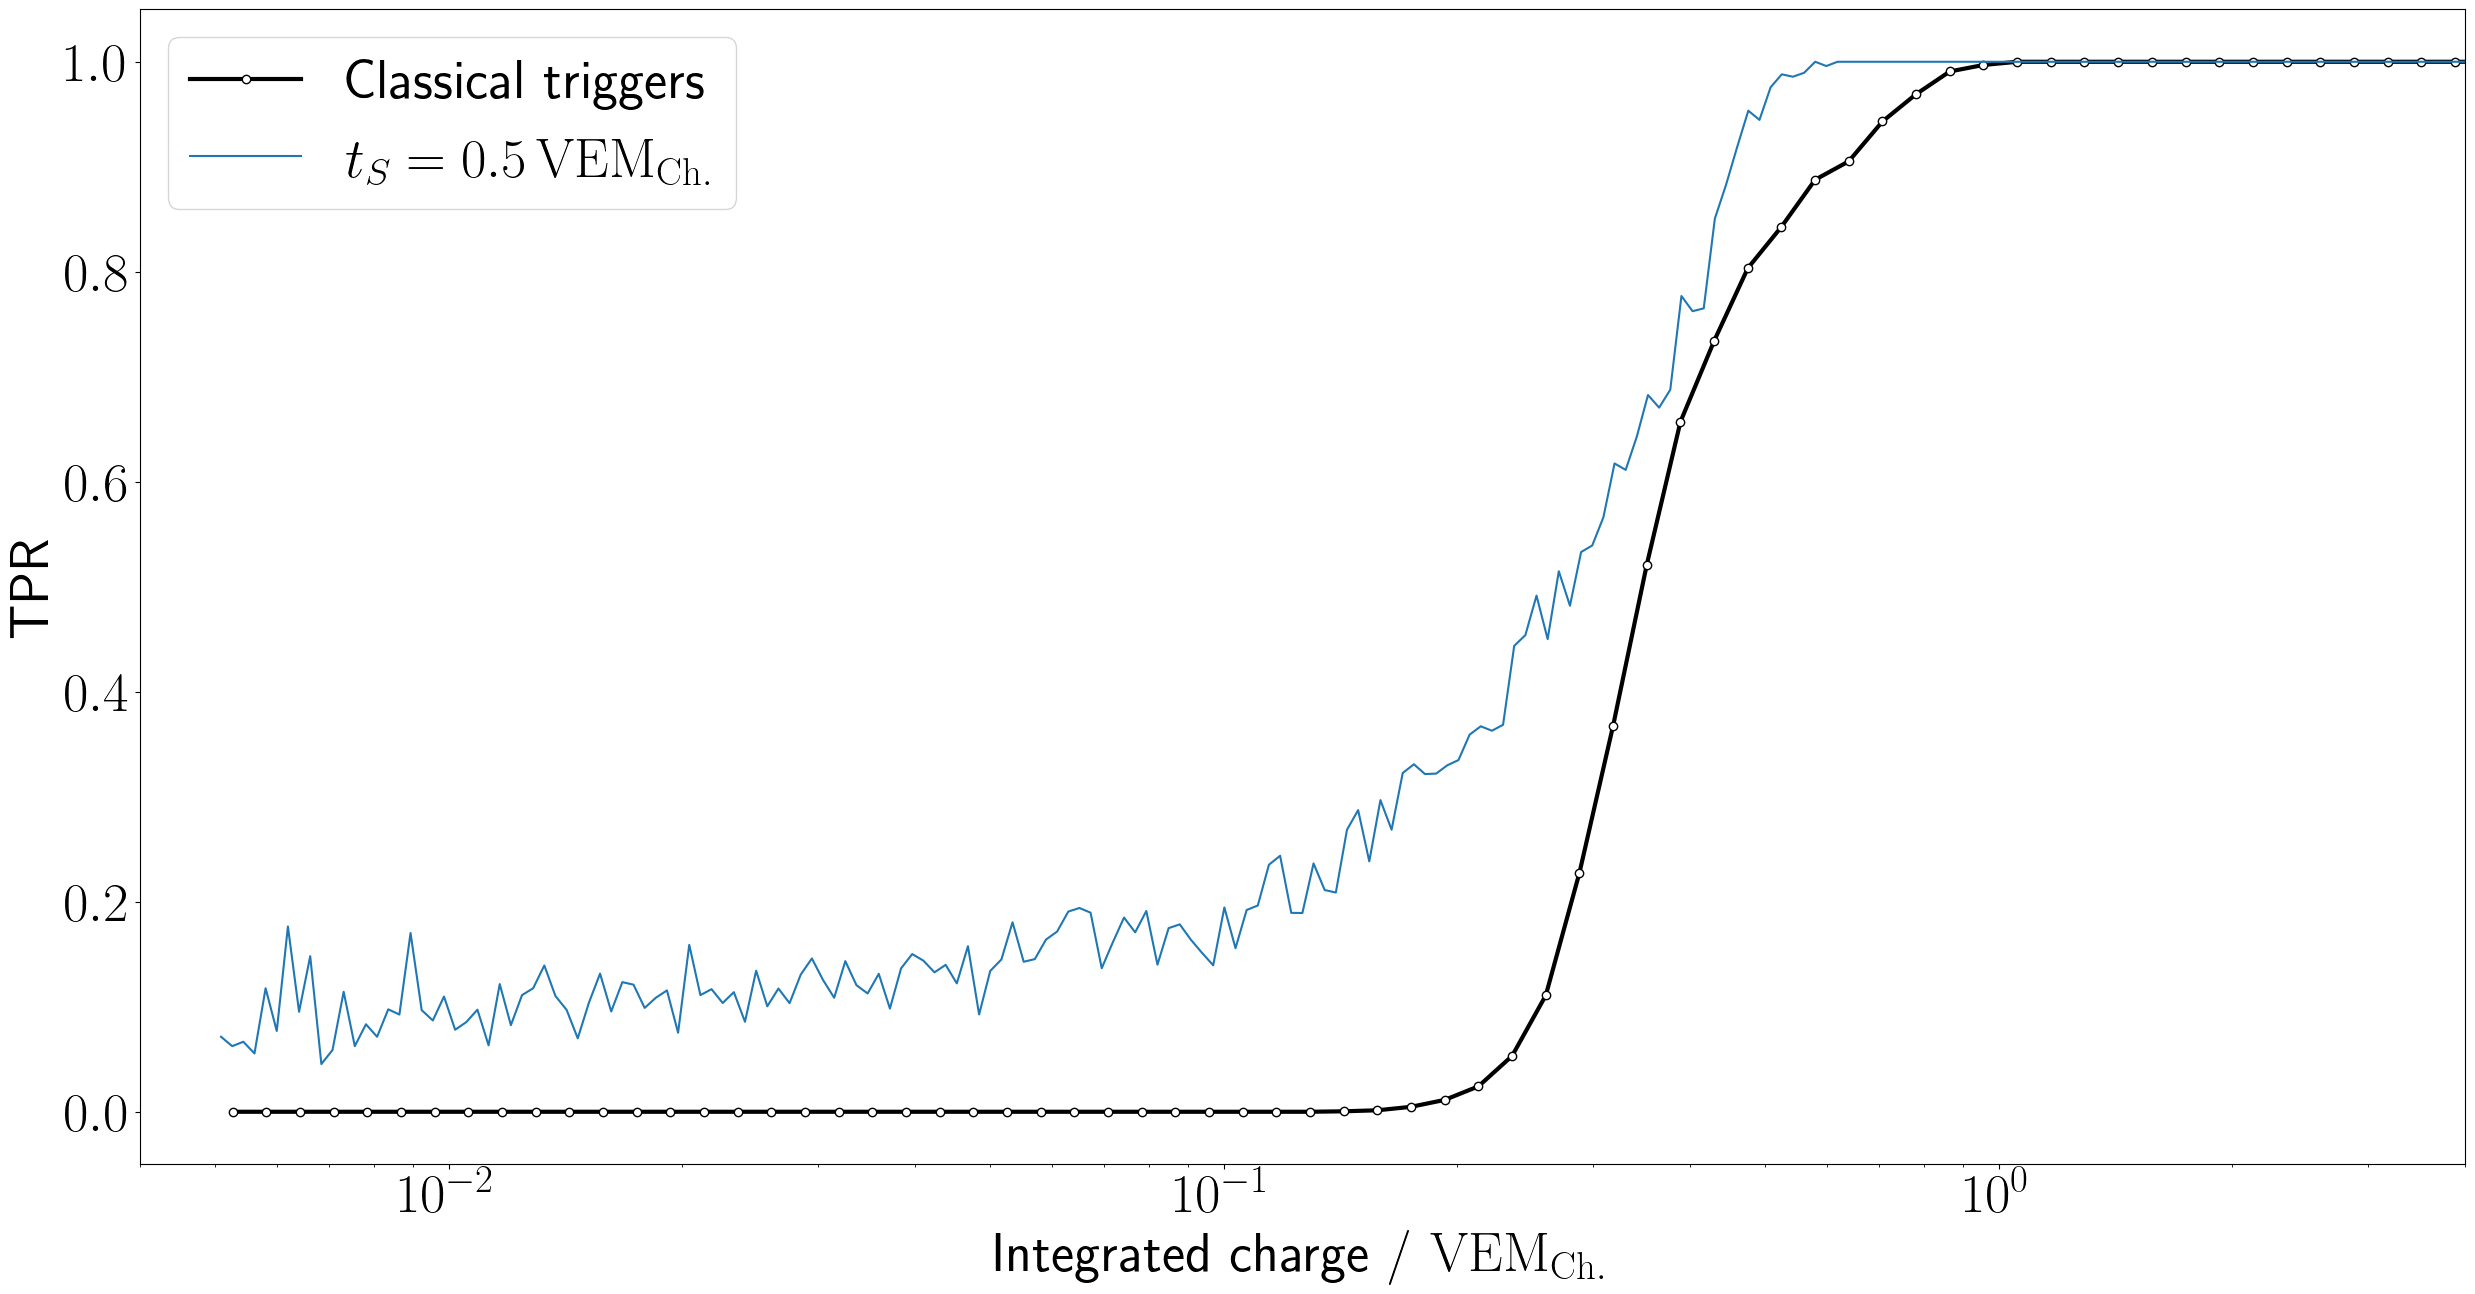

In [5]:
from Binaries import *

Trigger = HardwareClassifier()
Trigger.signal_efficiency("final_all_triggers", c = "k", lw = 3, label = "Classical triggers", mfc = "w", fmt = "-o")

# Models = Ensemble(f"120_TwoLayer_Downsampled_AllEnergies_NoCuts", supress_print = True)
# BestModel = Models.get_best_model("validation_data")
# BestModel.signal_efficiency("validation_data", label = i_ch, n_bins = 300)

for i_ch in ["5_0VEM"]:
    save_model = "final_predictions" if i_ch != "NoCuts" else "validation_data"
    Models = Ensemble(f"120_LSTM_3L_Downsampled_AllEnergies_{i_ch}", supress_print = True)
    BestModel = Models.get_best_model(save_model)
    BestModel.signal_efficiency(save_model, n_bins = 300, label = f"$t_S = 0.5\,\mathrm{{VEM}}_{{\mathrm{{Ch.}}}}$")

# for x in [5.0]:
#     plt.axvline(x, ls = "--")

plt.xlabel("Integrated charge / $\mathrm{VEM}_\mathrm{Ch.}$")
plt.ylabel("TPR")

plt.xlim(0.004, 4)
plt.xscale("log")
plt.legend()